In [123]:
from Assignment3_part1 import *
from tqdm import tqdm
from scipy.stats import norm

## Variables qui nous intéressent

* SAA_weights_IS
* SAA_weights_OS
* TAA_weights_IS
* TAA_weights_OS
* weight_target_IS
* weight_target_OS
* benchmark_weights_IS
* benchmark_weights_OS

### Benchmark (50% Equities / 50% Bond)

### Return

* returns_IS_price
* returns_OS_price

In [124]:
# SAA
SAA_active_weight_IS = SAA_weights_IS - benchmark_weights_IS
SAA_active_weight_OS = SAA_weights_OS - benchmark_weights_OS

# TAA
TAA_active_weight_IS = TAA_weights_IS - benchmark_weights_IS
TAA_active_weight_OS = TAA_weights_OS - benchmark_weights_OS

# Real portfolio
active_weight_target_IS = weight_target_IS - benchmark_weights_IS
active_weight_target_OS = weight_target_OS - benchmark_weights_OS

# Question 1

In [125]:
MCR_SAA_active_IS = MCR_calc(SAA_active_weight_IS,returns_IS_price)

MCR_TAA_active_IS = MCR_calc(TAA_active_weight_IS,returns_IS_price)

MCR_real_IS = MCR_calc(active_weight_target_IS,returns_IS_price)

In [126]:
# SAA
MCR_SAA = []
MCR_SAA_final = []
MCR_TAA = []
MCR_TAA_final = []
MCR_real = []
MCR_real_final = []

SAA_rolling = SAA_active_weight_IS.copy()
TAA_rolling = TAA_active_weight_IS.copy()
Real_rolling = weight_target_IS.copy()
return_rolling = returns_IS_price.copy()
for i in tqdm(range(len(SAA_active_weight_OS))):
    SAA_rolling = SAA_rolling.append(SAA_active_weight_OS.iloc[i,:])
    TAA_rolling = TAA_rolling.append(TAA_active_weight_OS.iloc[i,:])
    Real_rolling = Real_rolling.append(active_weight_target_OS.iloc[i,:])

    return_rolling = return_rolling.append(returns_OS_price.iloc[i,:])
    MCR_SAA.append(MCR_calc(SAA_rolling,return_rolling))
    MCR_TAA.append(MCR_calc(TAA_rolling,return_rolling))
    MCR_real.append(MCR_calc(Real_rolling,return_rolling))
    #print(MCR_SAA[-1])
    MCR_SAA_final.append(MCR_SAA[-1].iloc[:,-1])
    MCR_TAA_final.append(MCR_TAA[-1].iloc[:,-1])
    MCR_real_final.append(MCR_real[-1].iloc[:,-1])
    
SAA_MCR = pd.DataFrame(MCR_SAA_final[:])
TAA_MCR = pd.DataFrame(MCR_TAA_final[:])
real_MCR = pd.DataFrame(MCR_real_final[:])

100%|██████████| 124/124 [00:03<00:00, 35.42it/s]


In [127]:
SAA_MCR = pd.DataFrame(MCR_SAA_final[:])
SAA_MCR

,0,1,2,3,4,5,6
2011-01-31,-0.049001,0.003644,-0.002335,-0.020048,0.000907,-0.020199,-0.040097
2011-02-28,-0.048889,0.003645,-0.002330,-0.019966,0.000674,-0.020027,-0.039949
2011-03-31,-0.048703,0.003623,-0.002327,-0.019887,0.000673,-0.019851,-0.039844
2011-04-29,-0.048626,0.003587,-0.002370,-0.019817,0.000301,-0.020036,-0.039558
2011-05-31,-0.048485,0.003592,-0.002321,-0.019724,0.000164,-0.020245,-0.039507
...,...,...,...,...,...,...,...
2020-12-31,-0.044592,0.003438,-0.002794,-0.017455,0.002136,-0.029934,-0.032105
2021-01-29,-0.044503,0.003428,-0.002793,-0.017419,0.002122,-0.029854,-0.032039
2021-02-26,-0.044412,0.003497,-0.002687,-0.017341,0.002390,-0.030325,-0.032278
2021-03-31,-0.044352,0.003503,-0.002614,-0.017266,0.002459,-0.030123,-0.032075


# Question 2

## Variance Covariance method

In [128]:
ptf_return_SAA = np.multiply(SAA_active_weight_OS,returns_OS_price).sum(axis=1)
mean_SAA = np.mean(ptf_return_SAA)
std_SAA = np.std(ptf_return_SAA)

ptf_return_TAA = np.multiply(TAA_active_weight_OS,returns_OS_price).sum(axis=1)
mean_TAA = np.mean(ptf_return_TAA)
std_TAA = np.std(ptf_return_TAA)

ptf_return_Real = np.multiply(active_weight_target_OS,returns_OS_price).sum(axis=1)
mean_Real = np.mean(ptf_return_Real)
std_Real = np.std(ptf_return_Real)

## VaR

In [129]:
VaR_95_SAA = norm.ppf(1-0.95,mean_SAA,std_SAA)
print(f'VaR 95% SAA: {VaR_95_SAA}')

VaR_95_TAA = norm.ppf(1-0.95,mean_TAA,std_TAA)
print(f'VaR 95% TAA: {VaR_95_TAA}')

VaR_95_Real = norm.ppf(1-0.95,mean_Real,std_Real)
print(f'VaR 95% Real: {VaR_95_Real}')

VaR 95% SAA: -0.03292615618768459
VaR 95% TAA: -0.06868917746927439
VaR 95% Real: -0.06523311983250694


## ES

In [130]:
ES_var_SAA = ptf_return_SAA[ptf_return_SAA <= VaR_95_SAA].mean()
ES_var_TAA = ptf_return_TAA[ptf_return_TAA <= VaR_95_TAA].mean()
ES_var_Real = ptf_return_Real[ptf_return_Real <= VaR_95_Real].mean()

print(f'ES SAA var 5%: {ES_var_SAA}')
print(f'ES TAA var 5%: {ES_var_TAA}')
print(f'ES Real var 5%: {ES_var_Real}')

ES SAA var 5%: -0.04104471398345727
ES TAA var 5%: -0.08103724005998526
ES Real var 5%: -0.07471464156853269


## Historical method

### VaR

In [131]:
ptf_return_SAA_sort = ptf_return_SAA.sort_values(ascending=True)
ptf_return_TAA_sort = ptf_return_TAA.sort_values(ascending=True)
ptf_return_Real_sort = ptf_return_Real.sort_values(ascending=True)


print(f'VaR SAA 5%: {ptf_return_SAA_sort.quantile(0.05)}')
print(f'VaR TAA 5%: {ptf_return_TAA_sort.quantile(0.05)}')
print(f'VaR Real 5%: {ptf_return_Real_sort.quantile(0.05)}')

VaR SAA 5%: -0.027072011521389647
VaR TAA 5%: -0.05694802610459951
VaR Real 5%: -0.056638707509634775


## ES

In [132]:
#https://s3.amazonaws.com/assets.datacamp.com/production/course_5612/slides/chapter4.pdf

ES_SAA_hist = ptf_return_SAA_sort[ptf_return_SAA_sort <= np.quantile(ptf_return_SAA_sort,0.05)].mean()
ES_TAA_hist = ptf_return_TAA_sort[ptf_return_TAA_sort <= np.quantile(ptf_return_TAA_sort,0.05)].mean()
ES_Real_hist = ptf_return_Real_sort[ptf_return_Real_sort <= np.quantile(ptf_return_Real_sort,0.05)].mean()

print(f'ES SAA hist 5%: {ES_SAA_hist}')
print(f'ES TAA hist 5%: {ES_TAA_hist}')
print(f'ES Real hist 5%: {ES_Real_hist}')

ES SAA hist 5%: -0.03757842294207015
ES TAA hist 5%: -0.07091502938402984
ES Real hist 5%: -0.06817750539266482


# Age weigthed simulation

https://rstudio-pubs-static.s3.amazonaws.com/380973_abe685cfa68b4890a82e247c5e8e5869.html#/3

In [133]:
lamb = 0.98
n = len(ptf_return_SAA)
age = [i+1 for i in range(n)]
age = np.sort(age)[::-1]
w = []
#print(age)
for i in range(n):
    temp = ((1-lamb)*(lamb**(age[i]-1)))/(1-lamb**n)
    w.append(temp)

df_SAA = pd.DataFrame(ptf_return_SAA,columns=['return'])
df_SAA["w"] = w
df_SAA = df_SAA.sort_values(by='return',ascending=True)
df_SAA['cumsum_w'] = np.cumsum(w)

df_TAA = pd.DataFrame(ptf_return_TAA,columns=['return'])
df_TAA["w"] = w
df_TAA = df_TAA.sort_values(by='return',ascending=True)
df_TAA['cumsum_w'] = np.cumsum(w)

df_Real = pd.DataFrame(ptf_return_Real,columns=['return'])
df_Real["w"] = w
df_Real = df_Real.sort_values(by='return',ascending=True)
df_Real['cumsum_w'] = np.cumsum(w)


## VaR

In [134]:
SAA_weight_VaR = df_SAA['return'][df_SAA['cumsum_w'] <= 0.05].iloc[-1]
TAA_weight_VaR = df_TAA['return'][df_TAA['cumsum_w'] <= 0.05].iloc[-1]
Real_weight_VaR = df_Real['return'][df_Real['cumsum_w'] <= 0.05].iloc[-1]


SAA_weight_ES = df_SAA['return'][df_SAA['return'] <= SAA_weight_VaR].mean()

print(f'VaR weigthed SAA: {SAA_weight_VaR}')
print(f'VaR weigthed TAA: {TAA_weight_VaR}')
print(f'VaR weigthed Real: {Real_weight_VaR}')


VaR weigthed SAA: -0.0163524306514324
VaR weigthed TAA: -0.02889741887969
VaR weigthed Real: -0.025080524588452


## ES

In [135]:
SAA_weight_ES = df_SAA['return'][df_SAA['return'] <= SAA_weight_VaR].mean()
TAA_weight_ES = df_TAA['return'][df_TAA['return'] <= TAA_weight_VaR].mean()
Real_weight_ES = df_Real['return'][df_Real['return'] <= Real_weight_VaR].mean()

print(f'ES weigthed SAA: {SAA_weight_ES}')
print(f'ES weigthed TAA: {TAA_weight_ES}')
print(f'ES weigthed Real: {Real_weight_ES}')

ES weigthed SAA: -0.025712645074393227
ES weigthed TAA: -0.046182528021526496
ES weigthed Real: -0.043374809135124065


In [150]:
i = 1
window = 6
for i in range(len(ptf_return_SAA),1):
    value = ptf_return_SAA[(window)*(i-1):(window*i)]
    if len(value) < 6:
        value = ptf_return_SAA[(window+2)*(i-1):(window*i)]
print(value)

Copper


100%|██████████| 22/22 [00:00<00:00, 351.35it/s]
<ipython-input-184-40d9bacd783e>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
[0.027511620725911918, 0.05292832982877393, 0.05632443589524444, 0.01292602074120479, 0.028593895831419847, 0.037387667617023126, 0.03002234710872357, 0.01255185703766015, 0.03904850991791639, 0.04770447632844291, 0.039384296838865684, 0.024203909763798943, 0.010438111121807862, 0.020797787641840378, 0.03371778236011684, 0.044762296399309266, 0.05493118321495376, 0.03655820108550757, 0.07300317189446234, 0.07384546009970584, 0.06135503204439087]


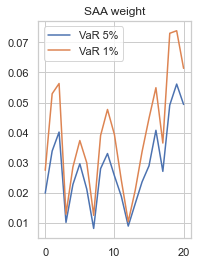

In [184]:
length = int(len(ptf_return_SAA)/6)
VaR_5 = []
VaR_1 = []
ES_5 = []
j = 1
ptfs = [ptf_return_SAA,ptf_return_TAA,ptf_return_Real]
for j in rangelen(ptfs):
    for i in tqdm(range(0,22)):
        value = ptf_return_SAA[(window)*(i-1):(window*i)]
        if len(value) < 6:
            value = ptf_return_SAA[(window)*(i-1)-2:(window*i)]
        temp_mean = np.mean(value)
        temp_std = np.std(value)
        var5 = norm.ppf(1-0.95,temp_mean,temp_std)
        var1 = norm.ppf(1-0.99,temp_mean,temp_std)

        value = value.sort_values(ascending=True)
        
        VaR_5.append(-var5)
        VaR_1.append(-var1)
        
        VaR_5 = VaR_5[1:]
        VaR_1 = VaR_1[1:]
        plt.subplot(12j)
        plt.plot(VaR_5,label='VaR 5%')
        plt.plot(VaR_1, label='VaR 1%')
        plt.title("SAA weight")

    plt.legend()
print(VaR_1)

In [141]:
ptf_return_SAA

Dates
2011-01-31   -0.013248
2011-02-28   -0.012085
2011-03-31    0.006264
2011-04-29   -0.011759
2011-05-31    0.014886
                ...   
2020-12-31   -0.014542
2021-01-29    0.002224
2021-02-26   -0.019414
2021-03-31   -0.017010
2021-04-30   -0.017777
Length: 124, dtype: float64